In [1]:
# Install the ultralytics package if not already installed
!pip install ultralytics

import torch
from ultralytics import YOLO
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_data()





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
x_train_subset = x_train[:1000]
x_test_subset = x_test[:100]
y_train_subset = y_train[:1000]
y_test_subset = y_test[:100]


0: 640x640 (no detections), 254.4ms
Speed: 5.5ms preprocess, 254.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 262.3ms
Speed: 4.3ms preprocess, 262.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 273.2ms
Speed: 4.3ms preprocess, 273.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 249.6ms
Speed: 5.5ms preprocess, 249.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 261.1ms
Speed: 5.7ms preprocess, 261.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 248.6ms
Speed: 5.5ms preprocess, 248.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 252.9ms
Speed: 6.8ms preprocess, 252.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 235.7ms
Speed: 4.0ms prepr

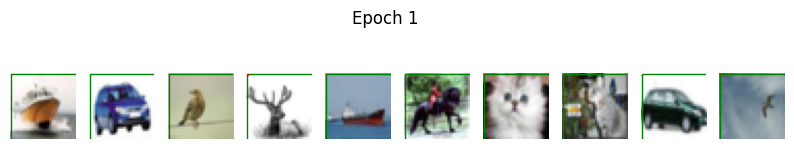

32/32 [==============================] - 0s 15ms/step
Epoch 2/50, Actor Loss: 3.450136916861931e-17, Critic Loss: 0.06737428158521652


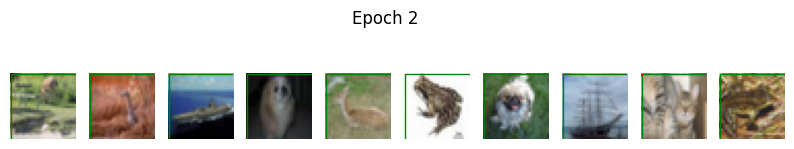

32/32 [==============================] - 0s 13ms/step
Epoch 3/50, Actor Loss: 1.2216587453403813e-17, Critic Loss: 0.0066465591080486774


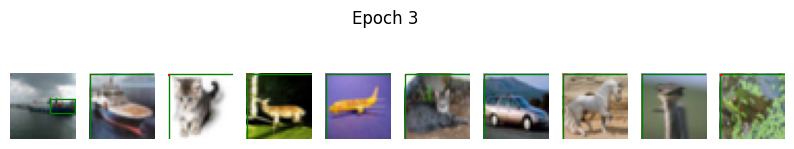

32/32 [==============================] - 0s 13ms/step
Epoch 4/50, Actor Loss: -3.2391602830091576e-18, Critic Loss: 0.0005934396176598966


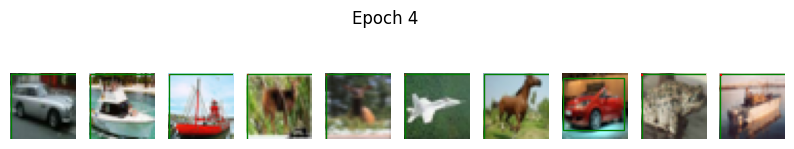

32/32 [==============================] - 1s 15ms/step
Epoch 5/50, Actor Loss: -8.229369278564469e-18, Critic Loss: 0.0026762974448502064


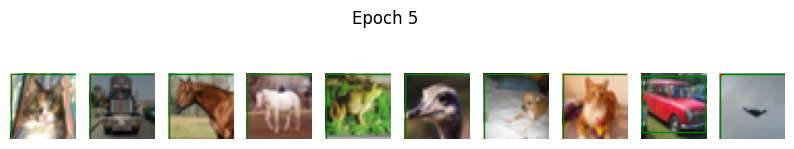

32/32 [==============================] - 1s 22ms/step
Epoch 6/50, Actor Loss: -7.425594568624242e-18, Critic Loss: 0.0023140215780586004


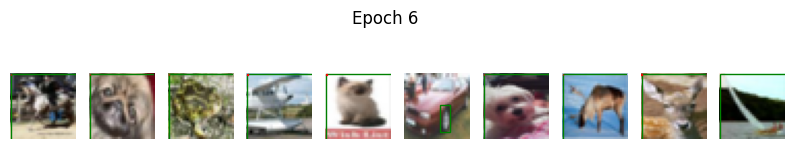

32/32 [==============================] - 0s 14ms/step
Epoch 7/50, Actor Loss: -4.256096541672156e-18, Critic Loss: 0.0009811996715143323


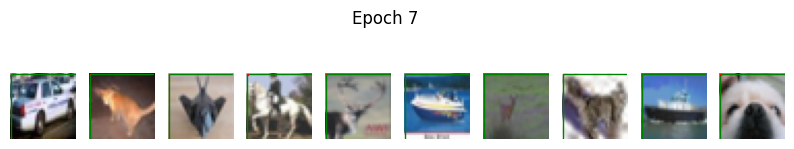

32/32 [==============================] - 1s 16ms/step
Epoch 8/50, Actor Loss: -1.1171798989540388e-18, Critic Loss: 0.000124349317047745


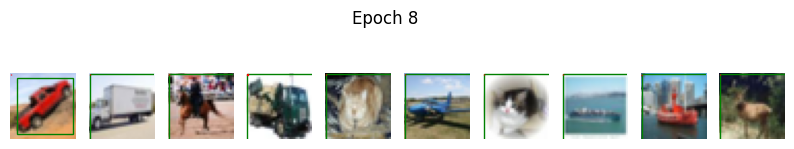

32/32 [==============================] - 1s 15ms/step
Epoch 9/50, Actor Loss: 2.4875672280360724e-18, Critic Loss: 0.00031335395760834217


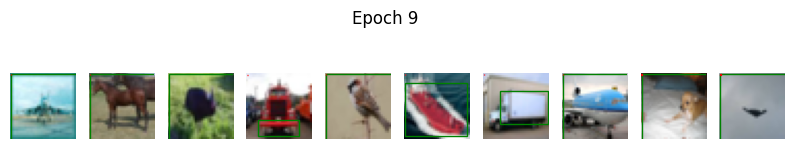

32/32 [==============================] - 1s 15ms/step
Epoch 10/50, Actor Loss: 3.851723095371014e-18, Critic Loss: 0.000717903021723032


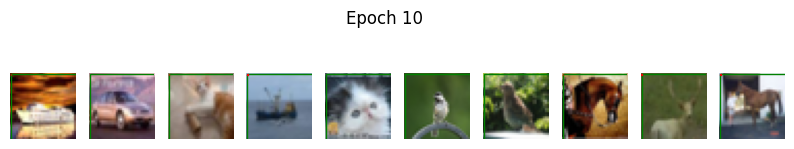

32/32 [==============================] - 0s 14ms/step
Epoch 11/50, Actor Loss: 3.3761763408288193e-18, Critic Loss: 0.0005867634317837656


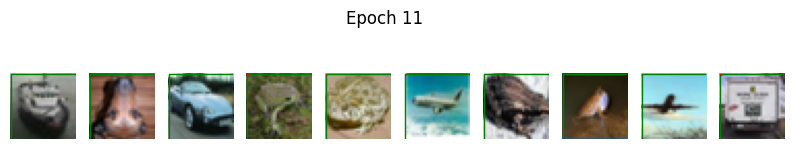

32/32 [==============================] - 0s 15ms/step
Epoch 12/50, Actor Loss: 2.0901669142987527e-18, Critic Loss: 0.0002165833138860762


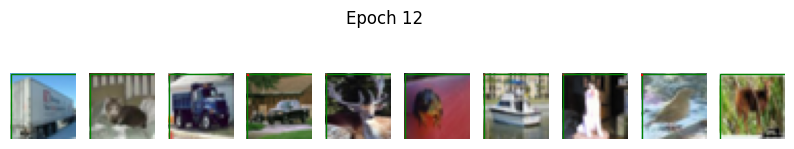

32/32 [==============================] - 1s 16ms/step
Epoch 13/50, Actor Loss: 2.0143011138402627e-19, Critic Loss: 3.821068094111979e-05


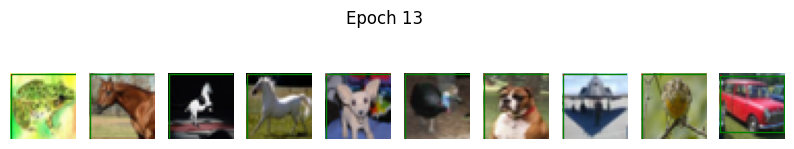

32/32 [==============================] - 1s 17ms/step
Epoch 14/50, Actor Loss: -1.2994308455590457e-18, Critic Loss: 0.00011711122351698577


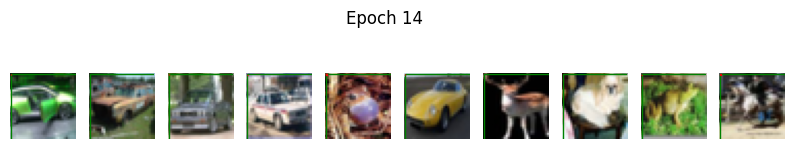

32/32 [==============================] - 1s 16ms/step
Epoch 15/50, Actor Loss: -2.112018544540566e-18, Critic Loss: 0.00026202324079349637


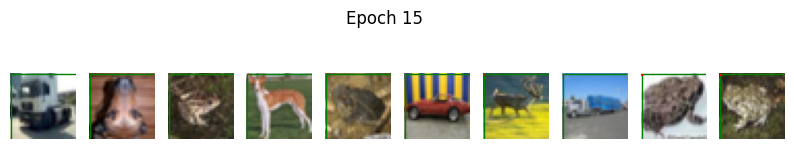

32/32 [==============================] - 1s 16ms/step
Epoch 16/50, Actor Loss: -2.724381179194185e-18, Critic Loss: 0.0002901926636695862


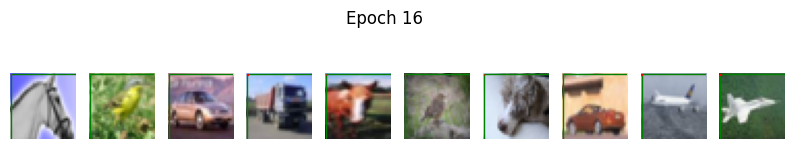

32/32 [==============================] - 1s 16ms/step
Epoch 17/50, Actor Loss: -1.9701045435188247e-18, Critic Loss: 0.0002017168590100482


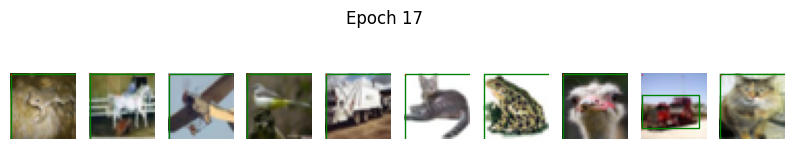

32/32 [==============================] - 1s 18ms/step
Epoch 18/50, Actor Loss: -1.0822255210142324e-18, Critic Loss: 8.775336027611047e-05


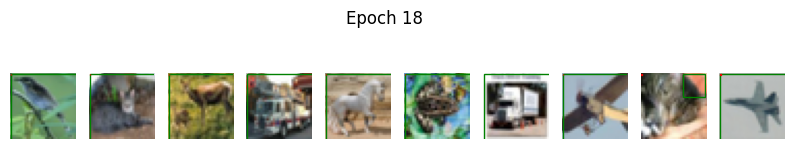

32/32 [==============================] - 1s 20ms/step
Epoch 19/50, Actor Loss: -1.4236768373833256e-19, Critic Loss: 3.1353200029116124e-05


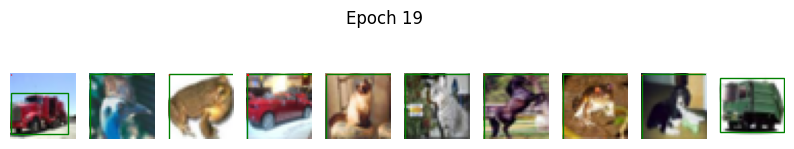

32/32 [==============================] - 1s 22ms/step
Epoch 20/50, Actor Loss: 7.065208622744715e-19, Critic Loss: 5.51522352907341e-05


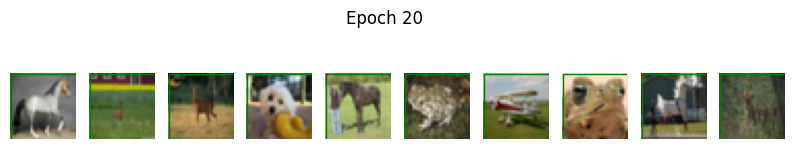

32/32 [==============================] - 1s 19ms/step
Epoch 21/50, Actor Loss: 1.3091968500635765e-18, Critic Loss: 0.00010564209514996037


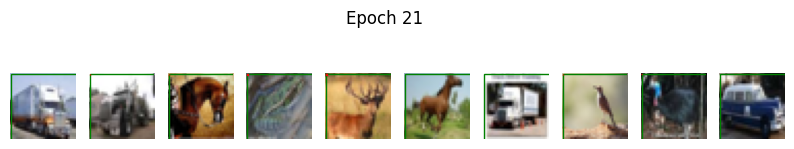

32/32 [==============================] - 1s 19ms/step
Epoch 22/50, Actor Loss: 1.3743605877568555e-18, Critic Loss: 0.00012452465307433158


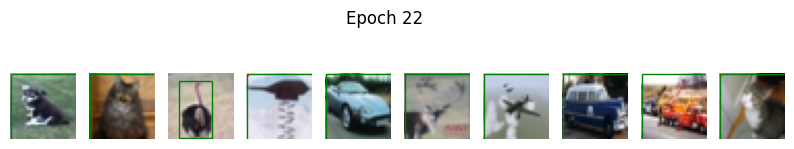

32/32 [==============================] - 1s 19ms/step
Epoch 23/50, Actor Loss: 1.211600394527859e-18, Critic Loss: 0.00010285609459970146


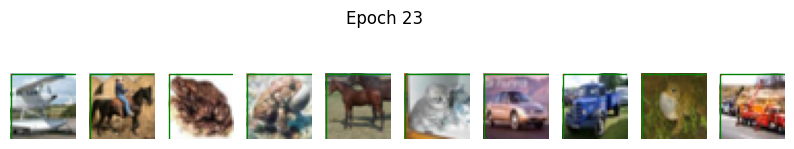

32/32 [==============================] - 1s 20ms/step
Epoch 24/50, Actor Loss: 8.905451290164273e-19, Critic Loss: 6.209988350747153e-05


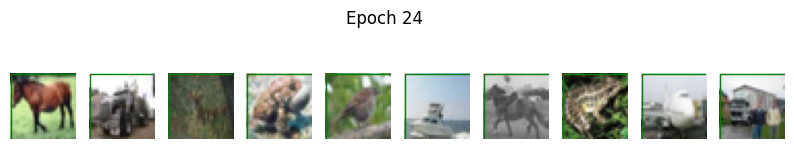

32/32 [==============================] - 1s 25ms/step
Epoch 25/50, Actor Loss: 3.4841488465708254e-19, Critic Loss: 3.139558612019755e-05


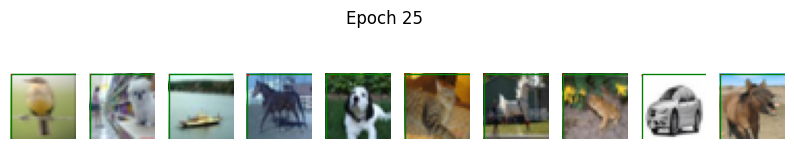

32/32 [==============================] - 1s 20ms/step
Epoch 26/50, Actor Loss: -1.7945939298339944e-19, Critic Loss: 2.66302922682371e-05


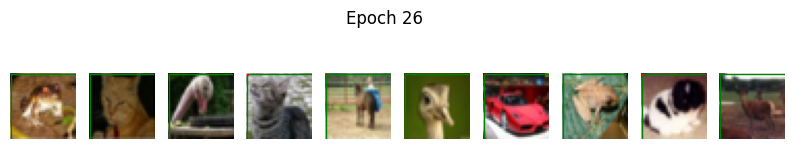

32/32 [==============================] - 1s 19ms/step
Epoch 27/50, Actor Loss: -5.886852617035362e-19, Critic Loss: 4.2693427531048656e-05


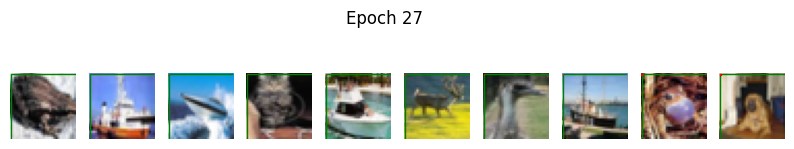

32/32 [==============================] - 1s 21ms/step
Epoch 28/50, Actor Loss: -8.369607825255484e-19, Critic Loss: 6.108131492510438e-05


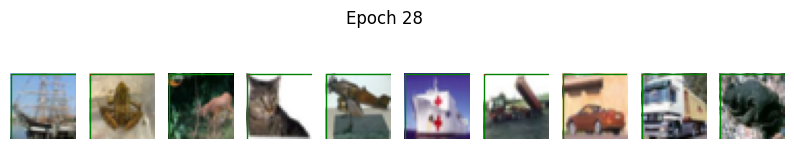

32/32 [==============================] - 1s 24ms/step
Epoch 29/50, Actor Loss: -9.109293408515715e-19, Critic Loss: 6.589674740098417e-05


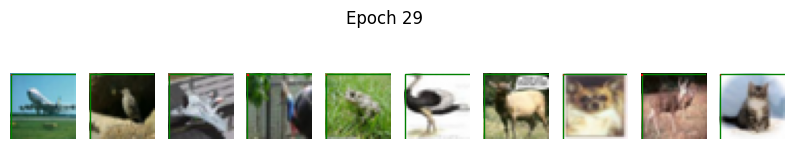

32/32 [==============================] - 1s 20ms/step
Epoch 30/50, Actor Loss: -7.255131359338422e-19, Critic Loss: 5.462460467242636e-05


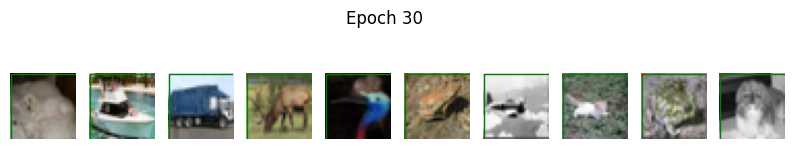

32/32 [==============================] - 1s 22ms/step
Epoch 31/50, Actor Loss: -4.959821998765293e-19, Critic Loss: 3.6556808481691405e-05


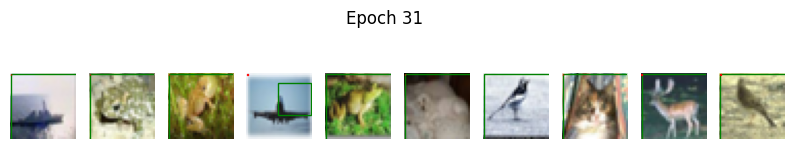

32/32 [==============================] - 1s 21ms/step
Epoch 32/50, Actor Loss: -1.654504689243545e-19, Critic Loss: 2.370600304857362e-05


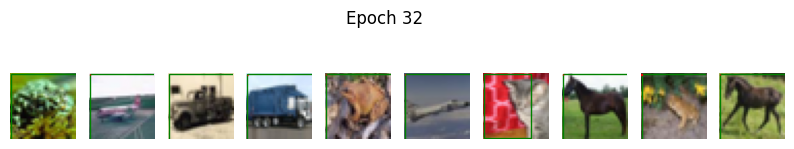

32/32 [==============================] - 1s 23ms/step
Epoch 33/50, Actor Loss: 2.0437957895444894e-19, Critic Loss: 2.234068415418733e-05


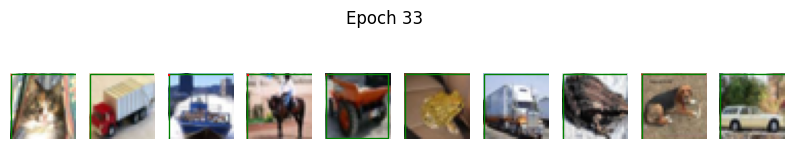

32/32 [==============================] - 1s 20ms/step
Epoch 34/50, Actor Loss: 3.784401708748679e-19, Critic Loss: 2.980956378451083e-05


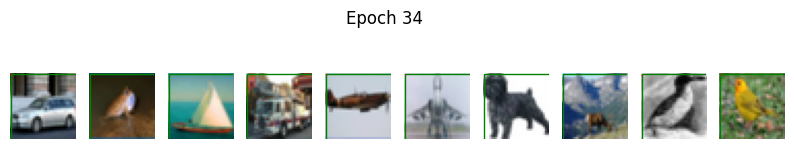

32/32 [==============================] - 1s 20ms/step
Epoch 35/50, Actor Loss: 6.0173263999927655e-19, Critic Loss: 3.799665137194097e-05


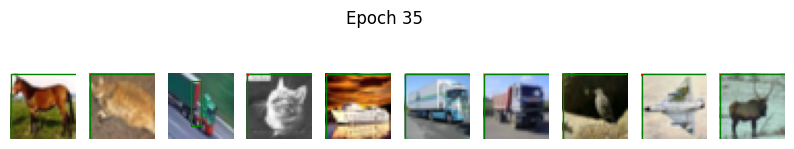

32/32 [==============================] - 1s 23ms/step
Epoch 36/50, Actor Loss: 6.12123372661438e-19, Critic Loss: 4.0057329897535965e-05


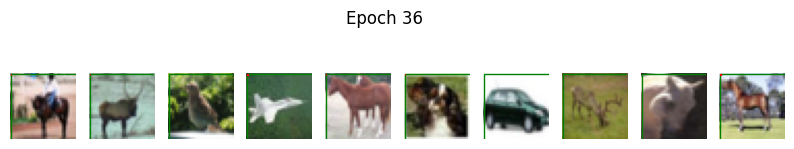

32/32 [==============================] - 1s 23ms/step
Epoch 37/50, Actor Loss: 5.6168122682370665e-19, Critic Loss: 3.479424776742235e-05


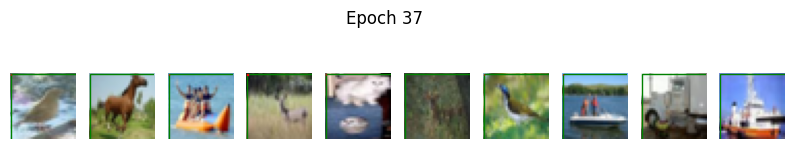

32/32 [==============================] - 1s 20ms/step
Epoch 38/50, Actor Loss: 3.834988973085125e-19, Critic Loss: 2.6296667783753946e-05


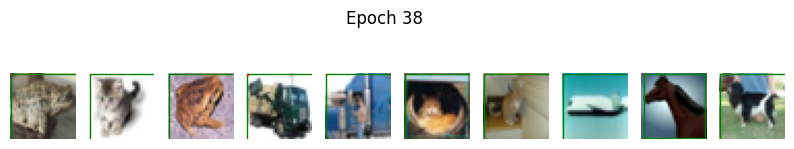

32/32 [==============================] - 1s 23ms/step
Epoch 39/50, Actor Loss: 1.4651647272407762e-19, Critic Loss: 2.0079251044080593e-05


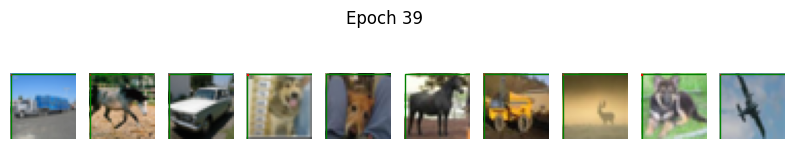

32/32 [==============================] - 1s 21ms/step
Epoch 40/50, Actor Loss: -7.816220893530211e-20, Critic Loss: 1.910417813633103e-05


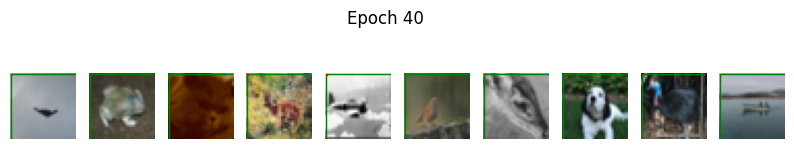

32/32 [==============================] - 1s 21ms/step
Epoch 41/50, Actor Loss: -2.3019588587222893e-19, Critic Loss: 2.2315800379146822e-05


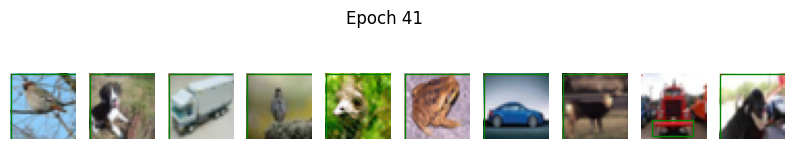

32/32 [==============================] - 1s 22ms/step
Epoch 42/50, Actor Loss: -3.572683796989966e-19, Critic Loss: 2.6114905267604627e-05


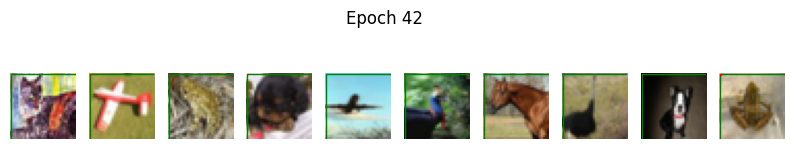

32/32 [==============================] - 1s 23ms/step
Epoch 43/50, Actor Loss: -3.876552989408325e-19, Critic Loss: 2.723078796407208e-05


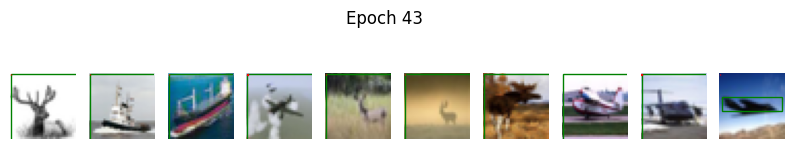

32/32 [==============================] - 1s 23ms/step
Epoch 44/50, Actor Loss: -3.608188973820156e-19, Critic Loss: 2.4852455680957064e-05


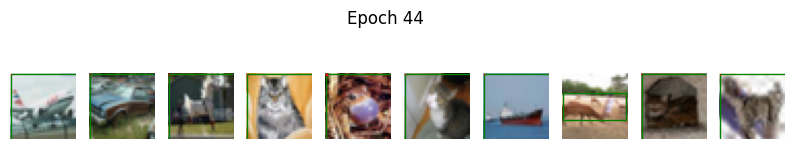

32/32 [==============================] - 1s 22ms/step
Epoch 45/50, Actor Loss: -2.6221483246263195e-19, Critic Loss: 2.069360743917059e-05


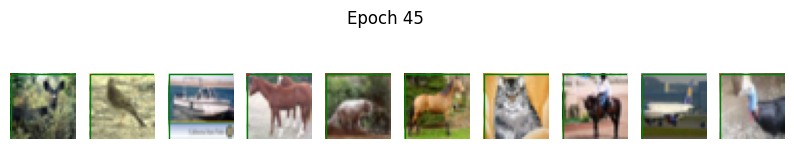

32/32 [==============================] - 1s 24ms/step
Epoch 46/50, Actor Loss: -9.070922050863029e-20, Critic Loss: 1.7389020285918377e-05


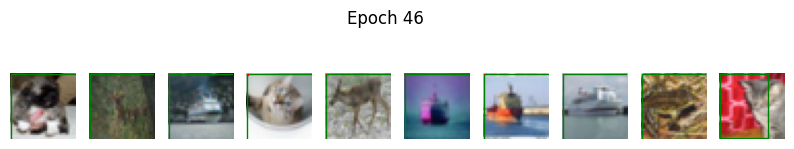

32/32 [==============================] - 1s 23ms/step
Epoch 47/50, Actor Loss: 9.226494690803793e-20, Critic Loss: 1.653609797358513e-05


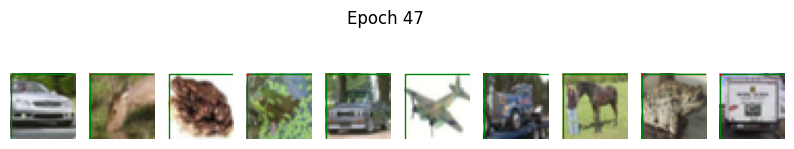

32/32 [==============================] - 1s 22ms/step
Epoch 48/50, Actor Loss: 3.28139447072489e-19, Critic Loss: 1.7829001080826856e-05


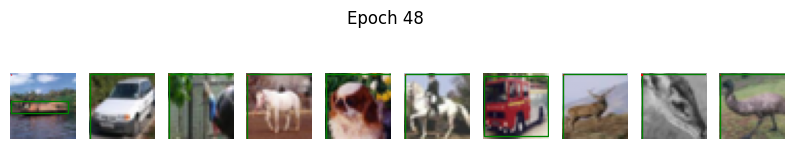

32/32 [==============================] - 1s 22ms/step
Epoch 49/50, Actor Loss: 3.0525828716077686e-19, Critic Loss: 1.960317422344815e-05


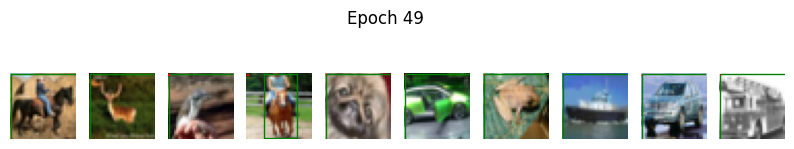

32/32 [==============================] - 1s 22ms/step
Epoch 50/50, Actor Loss: 3.936074579842168e-19, Critic Loss: 2.007465809583664e-05


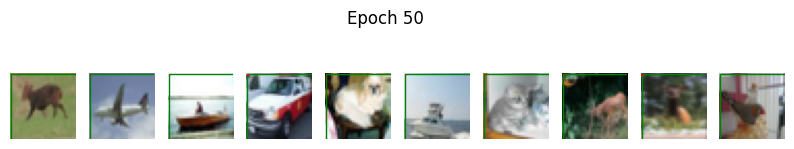

In [5]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Use the nano version for faster processing, you can choose other versions like yolov8s.pt

# Define a function to detect objects using YOLOv8
def detect_objects_yolo_v8(img):
    results = model(img)  # Perform object detection
    boxes = []
    for result in results[0].boxes:  # Accessing the bounding boxes
        x_min, y_min, x_max, y_max = result.xyxy[0]
        boxes.append([int(x_min), int(y_min), int(x_max), int(y_max)])  # Append the box coordinates
    return boxes

# Function to get ground truth boxes for a dataset
def get_ground_truth_boxes_v8(x_data):
    ground_truth_boxes = []
    for img in x_data:
        img_uint8 = (img * 255).astype(np.uint8)  # Convert image to uint8 format
        img_bgr = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2BGR)  # Convert to BGR format for YOLOv8
        boxes = detect_objects_yolo_v8(img_bgr)  # Detect objects
        if len(boxes) > 0:
            ground_truth_boxes.append(boxes[0])  # Use the first detected box
        else:
            ground_truth_boxes.append([0, 0, img.shape[1], img.shape[0]])  # Dummy box if no detection
    return np.array(ground_truth_boxes)

# Get ground truth boxes for training and testing subsets
ground_truth_boxes_train = get_ground_truth_boxes_v8(x_train_subset)
ground_truth_boxes_test = get_ground_truth_boxes_v8(x_test_subset)

# Function to build the actor model
def build_actor():
    model = models.Sequential()  # Sequential model
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Convolutional layer
    model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer
    model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer
    model.add(layers.Flatten())  # Flatten layer
    model.add(layers.Dense(64, activation='relu'))  # Dense layer
    model.add(layers.Dense(4, activation='linear'))  # Output layer for bounding box coordinates
    return model

# Function to build the critic model
def build_critic():
    model = models.Sequential()  # Sequential model
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Convolutional layer
    model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer
    model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer
    model.add(layers.Flatten())  # Flatten layer
    model.add(layers.Dense(64, activation='relu'))  # Dense layer
    model.add(layers.Dense(1))  # Output layer for state-value
    return model

# Build actor and critic models
actor = build_actor()
critic = build_critic()

# Compile the actor and critic models
actor.compile(optimizer='adam', loss='mse')
critic.compile(optimizer='adam', loss='mse')

# Function to calculate Intersection over Union (IoU) between two boxes
def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)  # Calculate intersection area
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])  # Calculate area of box1
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])  # Calculate area of box2
    union_area = box1_area + box2_area - intersection_area  # Calculate union area
    return intersection_area / union_area  # Calculate IoU

# Class for the Actor-Critic model
class ActorCritic:
    def __init__(self, actor, critic, gamma=0.99):
        self.actor = actor
        self.critic = critic
        self.gamma = gamma

    # Function to train the model
    def train(self, x, y, ground_truth_boxes, epochs=10):
        for epoch in range(epochs):
            values = self.critic.predict(x)  # Predict state-values
            actions = self.actor.predict(x)  # Predict bounding boxes

            # Calculate IoU as rewards
            rewards = np.array([iou(ground_truth_boxes[i], actions[i]) for i in range(x.shape[0])])
            advantages = rewards - values.flatten()  # Calculate advantages

            # Train actor and critic models
            actor_loss = self.actor.train_on_batch(x, actions, sample_weight=advantages)
            critic_loss = self.critic.train_on_batch(x, rewards)

            # Print loss values
            print(f'Epoch {epoch+1}/{epochs}, Actor Loss: {actor_loss}, Critic Loss: {critic_loss}')
            self.visualize_results(epoch, x, ground_truth_boxes, actions)  # Visualize results

    # Function to visualize results
    def visualize_results(self, epoch, x, ground_truth_boxes, predicted_boxes):
        indices = np.random.choice(len(x), 10, replace=False)  # Randomly select 10 images
        sample_images = x[indices]

        plt.figure(figsize=(10, 2))
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(sample_images[i])
            true_box = ground_truth_boxes[indices[i]]
            pred_box = predicted_boxes[indices[i]]
            plt.gca().add_patch(plt.Rectangle((true_box[0], true_box[1]), true_box[2]-true_box[0], true_box[3]-true_box[1], edgecolor='g', facecolor='none'))  # Draw ground truth box
            plt.gca().add_patch(plt.Rectangle((pred_box[0], pred_box[1]), pred_box[2]-pred_box[0], pred_box[3]-pred_box[1], edgecolor='r', facecolor='none'))  # Draw predicted box
            plt.axis('off')
        plt.suptitle(f'Epoch {epoch+1}')
        plt.show()

# Create the ActorCritic object
ac = ActorCritic(actor, critic)

# Train the model
ac.train(x_train_subset, y_train_subset, ground_truth_boxes_train, epochs=50)
